# **Title: Aqualytics - Leveraging Artificial Intelligence to Accurately Predict Fish Weight**


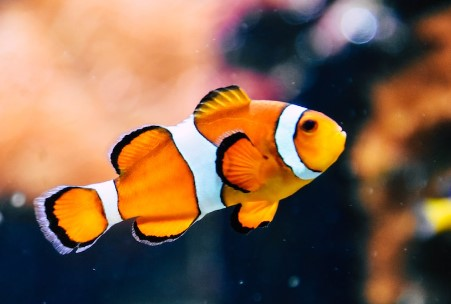

**Overview/Introduction:**
Fisheries play a big role in our food supply and economy. But there are challenges in this sector that can be eased with the use of advanced technology like artificial intelligence (AI). In this project, we aim to create an AI model to predict the weight of different kinds of fish sold in markets. This can help in managing stocks better, setting the right prices, and even protecting fish populations.

**Problem Statement:**
The current methods of figuring out how much a fish weighs can take a lot of time and may not be very accurate. This can create issues like wrong pricing and wastage. Also, if we don't know the correct weight, we might end up catching more fish than we need, which is bad for the environment. So, having an automated and accurate way to predict fish weight can solve a lot of these problems.

**Objectives:**
The main goal of this project is to use AI to predict fish weights as accurately as possible. Here's what we plan to do:

- Create an AI model that can predict fish weights based on the data we have.
Help fish markets work better by giving them a more accurate way to manage stocks and set prices.
- Protect fish populations by providing a better way to estimate how much fish is being caught.
- Test the model to make sure it's accurate and reliable.


**Dataset Description:**
This dataset contains information about seven different kinds of fish that are often sold in fish markets. The data is in a format that's easy for machines to read, which makes it good for training AI models. The data was collected from different fish markets. Each entry in the dataset represents a specific fish, with details about its type and weight. This gives us a wide range of weights for each kind of fish, which helps in making the AI model better at predictions.

**Dataset URL:** https://www.kaggle.com/datasets/aungpyaeap/fish-market


**Technologies Used:**

- **Python:** Python was the main programming language used for this project due to its powerful data processing and machine learning libraries.

- **Pandas:** Pandas library was utilized for data processing and manipulation tasks.

- **NumPy:** Used for mathematical and logical operations on arrays.

- **TensorFlow:** TensorFlow is an open-source machine learning library that allows us to define, optimize, and efficiently calculate mathematical expressions involving multi-dimensional arrays.

- **Keras:** Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow. It was used for building the Neural Network models.

- **Seaborn and Matplotlib:** These were used for creating visualizations like bar charts, pie charts, heatmaps, and boxplots.

- **Scikit-learn:** This library was used for splitting the dataset into training and testing subsets.

- **Keras Tuner:** Keras Tuner was used for hyperparameter tuning in the neural network model.

**Methodology:**

The project began with loading the fish dataset using Pandas. The data was explored to check its structure, and it was found that the dataset contained information about different species of fish.

Columns were renamed for better understanding, and the dataset was checked for duplicates and missing values. After confirming the absence of missing values, duplicate rows were examined and dealt with.

The data was then visualized through bar charts and pie charts to understand the distribution of the species. We then looked at outliers in the dataset using box plots and the interquartile range (IQR) method. Identified outliers were removed from the dataset to improve model accuracy.

The data was then shuffled, and the target (dependent) variable 'Weight' was separated from the independent variables. The data was split into a training set (80%) and a test set (20%) for model training and evaluation.

A neural network model was built and trained using the Keras library. Hyperparameters of the model were tuned using Keras Tuner to improve model performance.

**Implementation:**

The model was built using a function that defined its structure, compiled it, and returned the final model. The model architecture consisted of an input layer, hidden layers, a dropout layer, and an output layer. The number of layers, the number of units in each layer, the dropout rate, and regularization parameters were decided by the Keras Tuner.

The model was compiled with the mean squared error as the loss function, Adam as the optimizer, and mean absolute error as the metric.

The model was trained on the training set and validated on the test set. The model's performance was evaluated based on its mean absolute error on the test set.

**Results:**
The model's performance was evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE). The results indicated an MSE of 14613.6816 and an MAE of 96.4857.

**Discussion:**
The MSE is a measure of how well the model's predictions match the true values. It calculates the average squared difference between the predicted and actual values. In this case, the relatively high MSE suggests that the model has room for improvement as it indicates a large average squared difference between predicted and actual outcomes.

On the other hand, MAE measures the average magnitude of errors in a set of predictions, without considering their direction. It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. The MAE of 96.4857 obtained in this case indicates that on average, the model's predictions deviate from the actual values by approximately 96.49 units.

**Conclusion:**
Given the results, it is apparent that while the model is providing a fair prediction (as indicated by the obtained MAE and MSE values), there is scope for improvement. Further tuning of the model's parameters or trying different modeling techniques could potentially reduce these error metrics and improve the model's prediction capabilities.

The model's present performance must be evaluated in the context of the specific problem and application. If the current MSE and MAE are within acceptable limits for the task at hand, the model may be considered sufficient. If not, further adjustments and improvements will be necessary.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fish-market/Fish.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import itertools
import random
import os
import csv


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

The following code shows a function seed_everything() that sets the seed values for TensorFlow, NumPy, and Python's random library. This is done to ensure reproducibility of results in future use cases.

In [ ]:
# Seed Everything to reproduce results for future use cases
def seed_everything(seed=42):
    # Seed value for TensorFlow
    tf.random.set_seed(seed)

    # Seed value for NumPy
    np.random.seed(seed)

    # Seed value for Python's random library
    random.seed(seed)

seed_everything()

The following code shows the loading of a dataset from a CSV file using Pandas. The dataset contains information about fish species.

In [ ]:
df = pd.read_csv("/kaggle/input/fish-market/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


The next code renames specific columns in the dataset to provide more descriptive names for the fish measurements. This is done using the rename function in Pandas.

In [ ]:
df.rename(columns= {'Length1':'LengthVertical', 'Length2':'LengthDiagonal', 'Length3':'LengthCross'}, inplace=True)
df.head()

,Species,Weight,LengthVertical,LengthDiagonal,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   LengthVertical  159 non-null    float64
 3   LengthDiagonal  159 non-null    float64
 4   LengthCross     159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


**Check Duplicates and Missing Values**

The next code calculates and displays the number of data points in the DataFrame using the shape attribute. We will now check if there are any duplicate rows in the DataFrame df using the duplicated() function. The number of duplicates is calculated and printed. Next, we check if there are any missing values in the DataFrame df using the isnull() function. The missing values are summed by column and displayed. Additionally, the total number of missing values in the entire DataFrame is printed.

In [ ]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 159 data in this dataset
Number of Duplicates: 0
Number of Missing Values by column:
 Species           0
Weight            0
LengthVertical    0
LengthDiagonal    0
LengthCross       0
Height            0
Width             0
dtype: int64
Number of Missing Values: 0


**Review Duplicates**

To identify duplicate pairs of rows, the code first selects all duplicate rows using the duplicated() function with keep=False parameter. It then sorts the resulting DataFrame on all columns to ensure duplicates are adjacent. The top 5 pairs of duplicate rows (10 rows in total) are displayed.

In [ ]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(10)

top_5_duplicate_pairs


,Species,Weight,LengthVertical,LengthDiagonal,LengthCross,Height,Width


The next code computes descriptive statistics of the numerical columns in the DataFrame df using the describe() function. The resulting statistics, such as count, mean, standard deviation, minimum, and maximum, are transposed for better readability.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVertical,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDiagonal,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCross,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


**Correlation Matrix**

A heatmap is plotted using the heatmap() function from the seaborn library to visualize the correlation between the columns of the DataFrame df. This helps in understanding the relationships between different features.

/tmp/ipykernel_32/2032955765.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


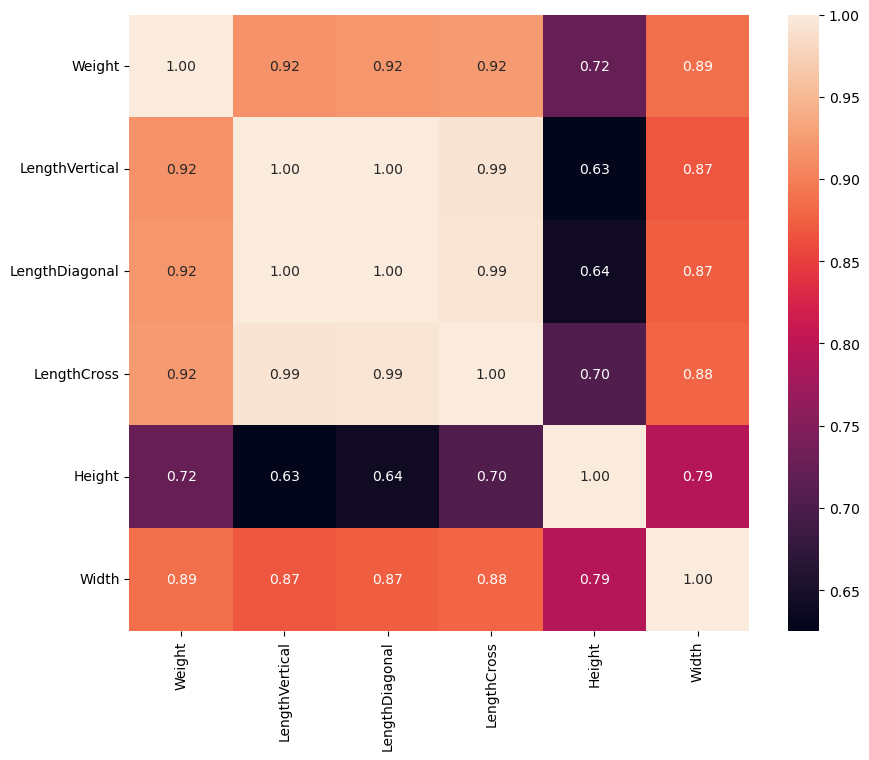

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
pass

Now we will perform a pairplot visualization using Seaborn (sns). This plot displays pairwise relationships between different numerical variables in the dataset, and the data points are colored based on the fish species.

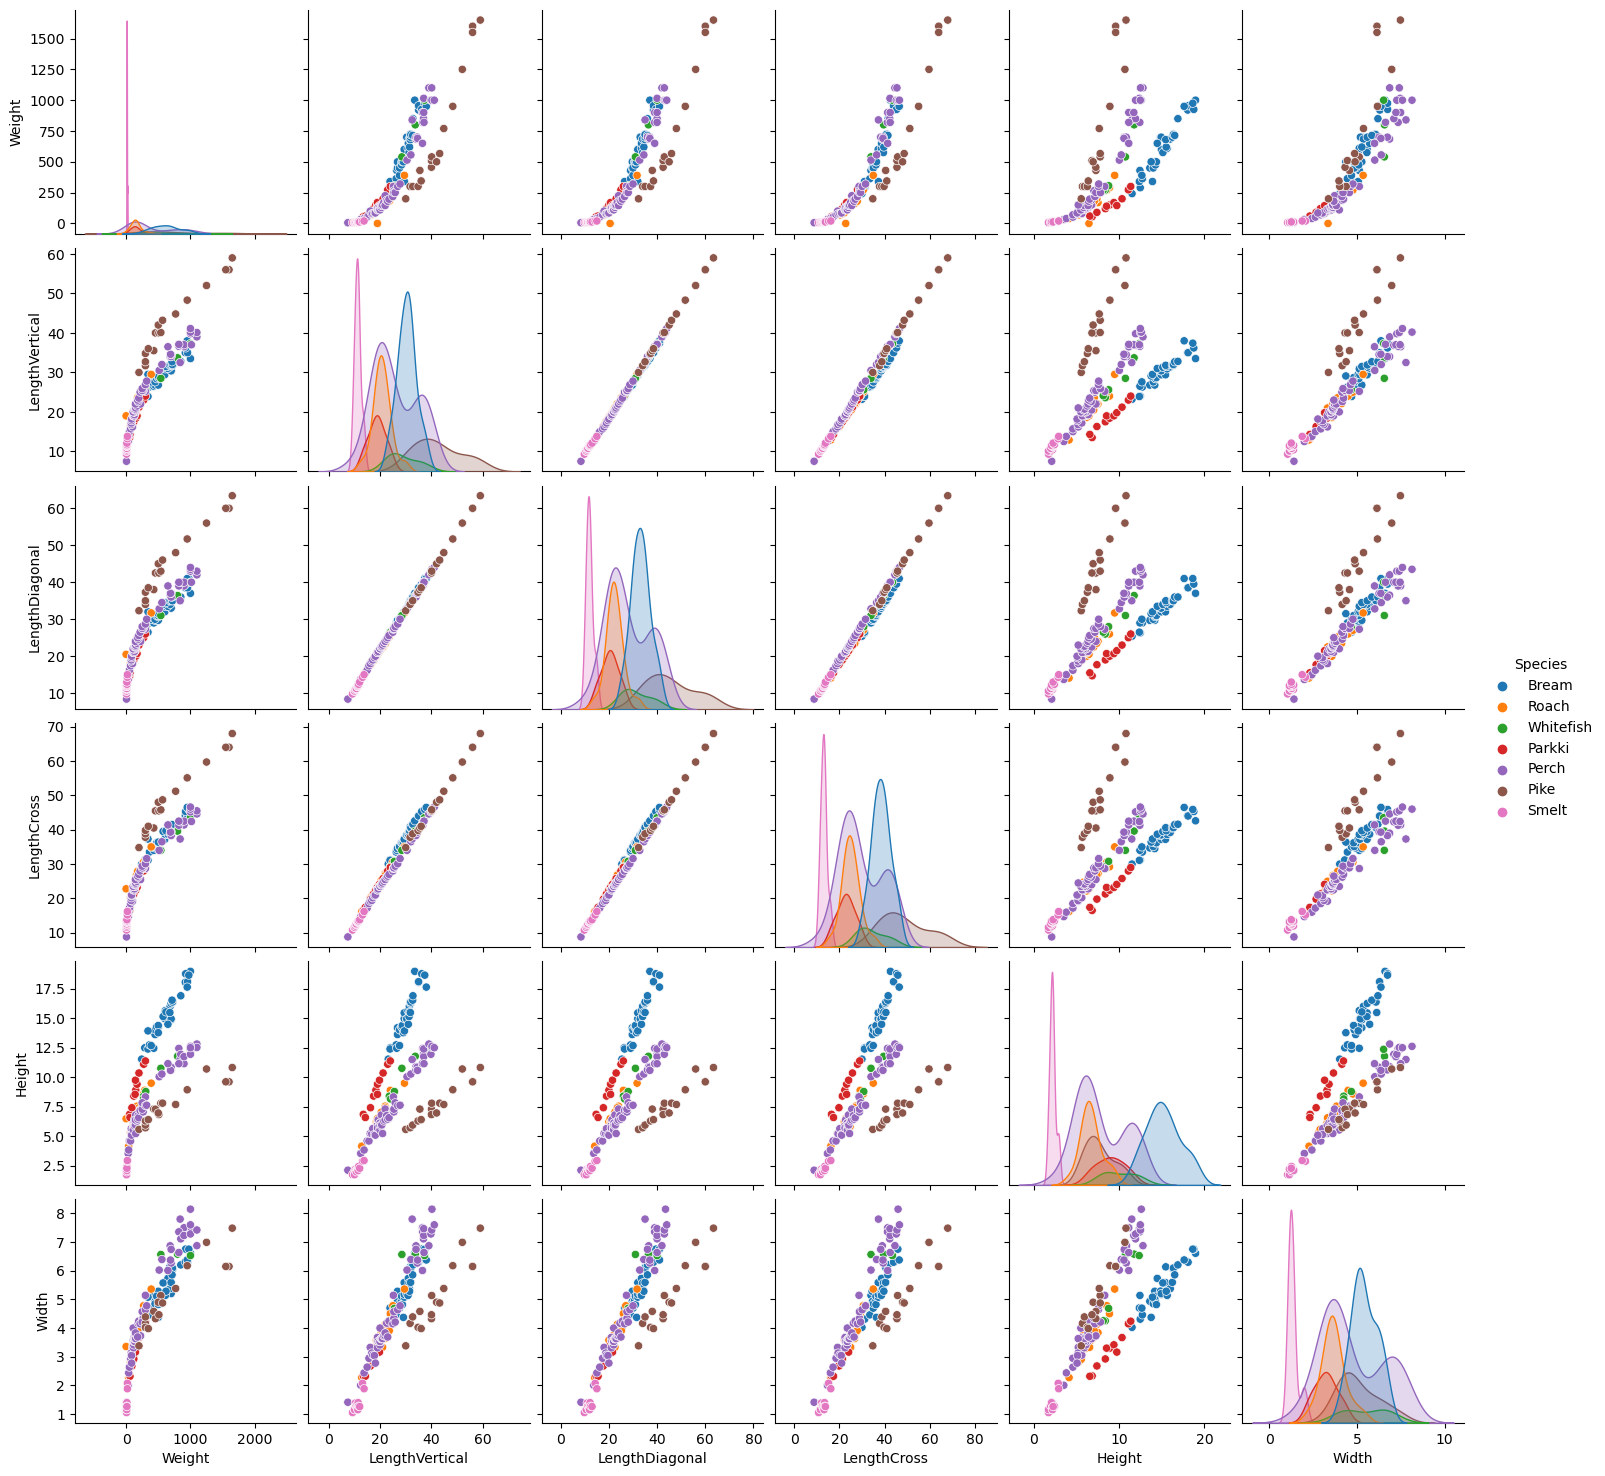

In [ ]:
g = sns.pairplot(df, kind='scatter', hue='Species');

We have a total of [number] fish species in our dataset. This code snippet prints the count of occurrences for each species in the dataset.

In [ ]:
total_categories = df['Species'].nunique()
print("We have a total of {} Fish species:".format(total_categories))
category_counts = df['Species'].value_counts()
print(category_counts)

We have a total of 7 Fish species:
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


We are creating a DataFrame called sp to store the count of occurrences for each fish species. The DataFrame is then transposed (T) to have species names as column headers.

In [ ]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


The next code snippet creates a bar chart to visualize the distribution of fish species. The x-axis represents different species, while the y-axis represents the number of occurrences.

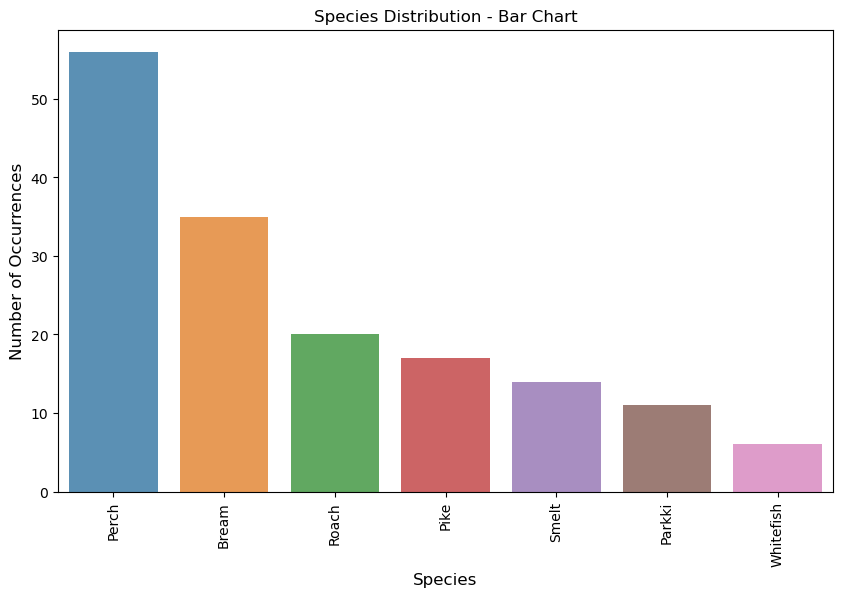

In [ ]:
value_counts = df['Species'].value_counts()

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=value_counts.index, y=value_counts.values, alpha=0.8)
plt.title('Species Distribution - Bar Chart')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.xticks(rotation=90) # Rotate labels for better readability if needed
plt.show()

A pie chart is created to visualize the distribution of fish species. Each slice of the pie represents a species, and the percentage value indicates its proportion in the dataset.

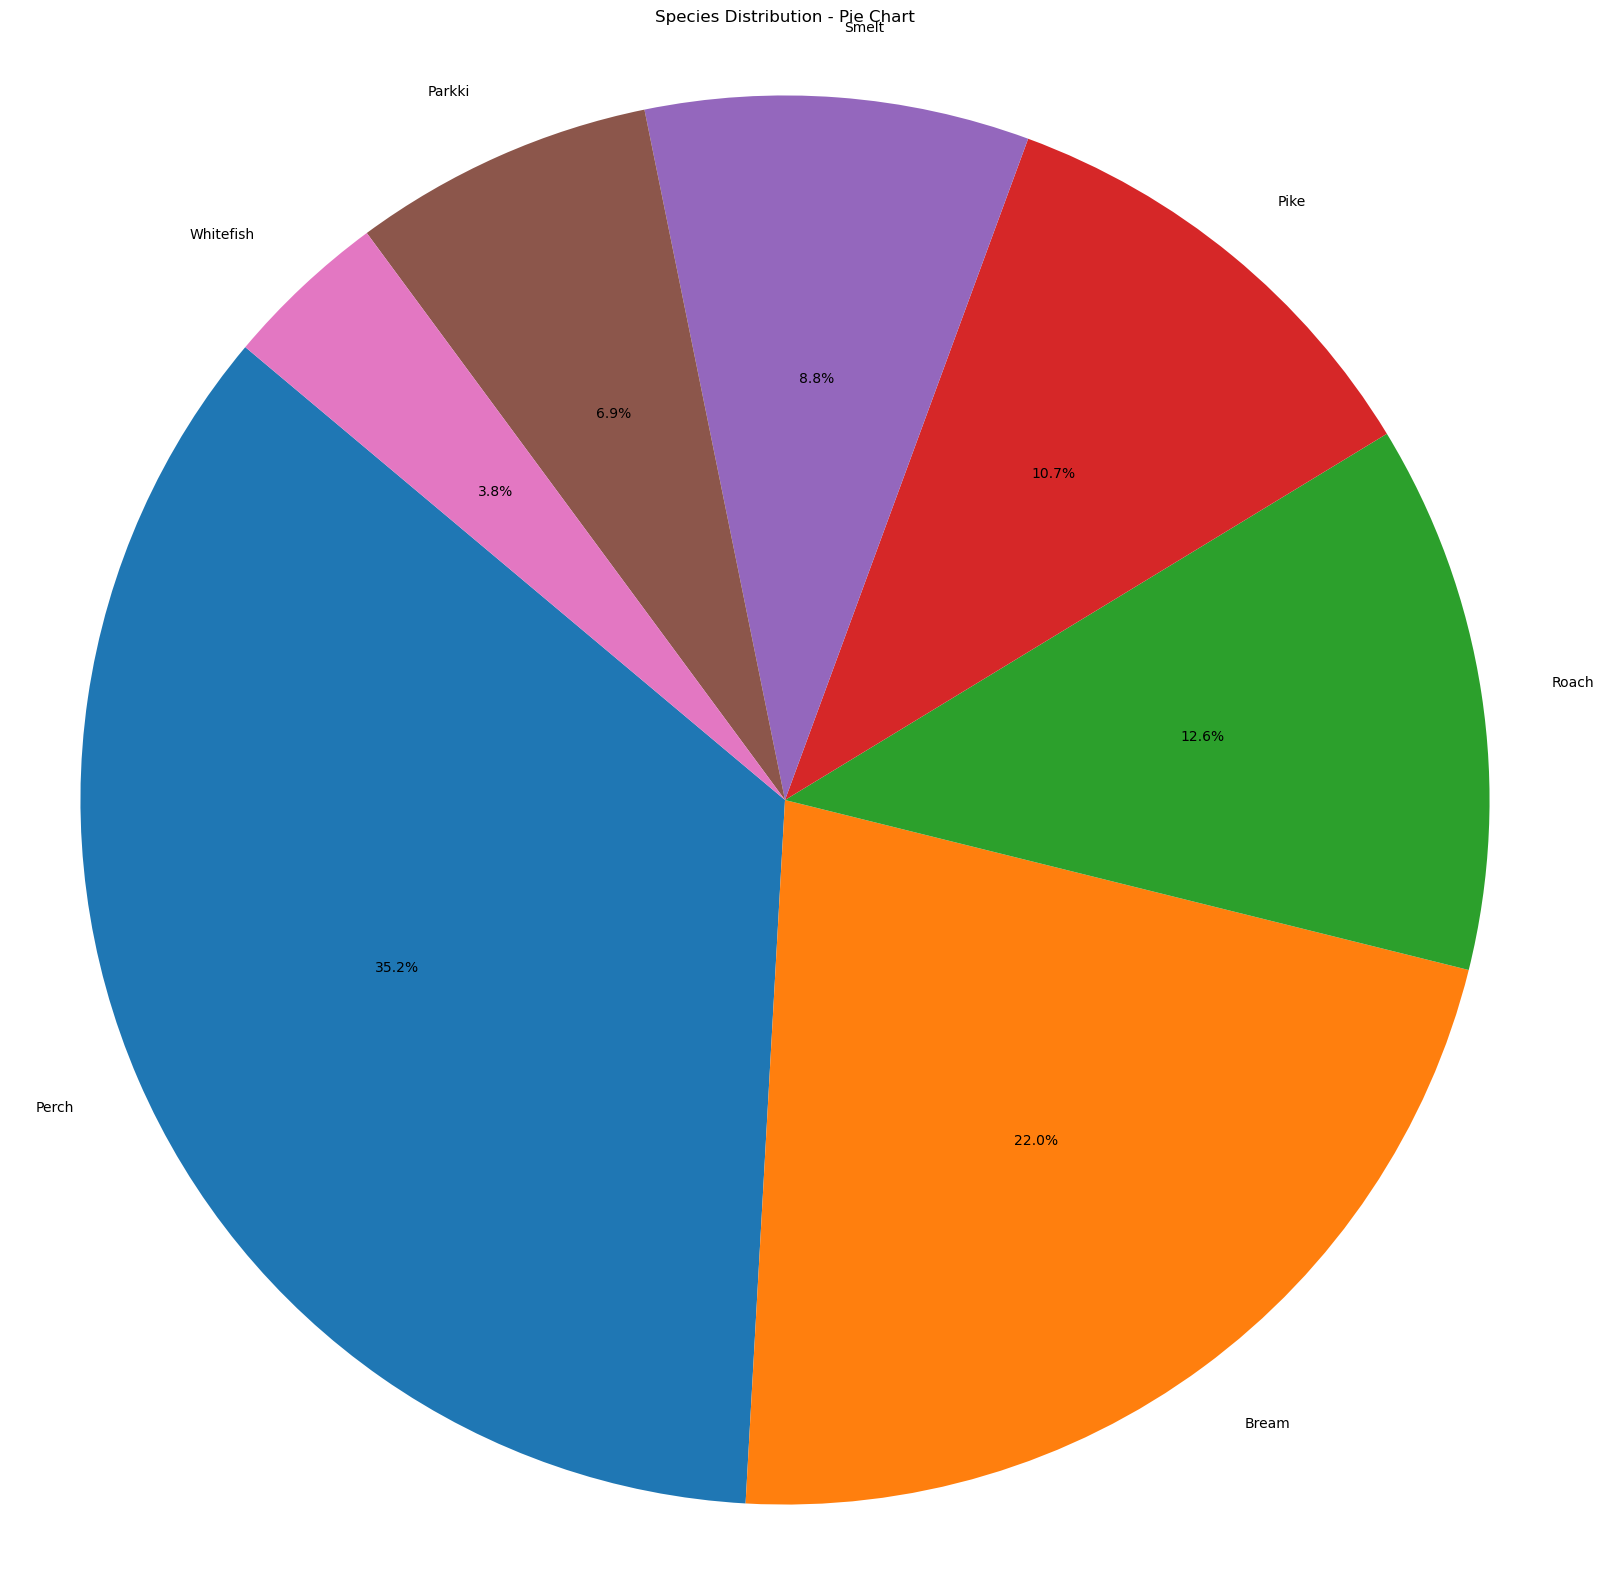

In [ ]:
# Pie chart
plt.figure(figsize=(20,20))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Species Distribution - Pie Chart')
plt.show()

**Outliers**

A boxplot is created to visualize the distribution of the 'Weight' feature in the dataset. It shows the median, quartiles, and any outliers present.

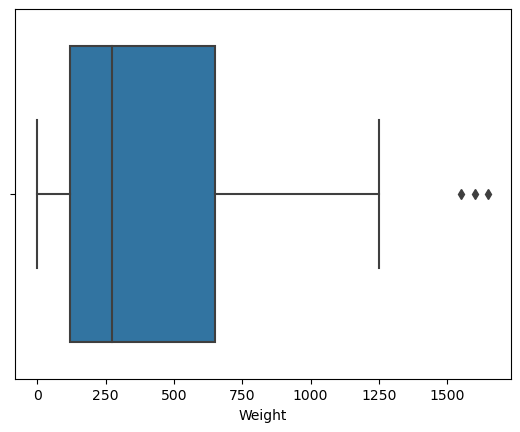

In [ ]:
sns.boxplot(x=df['Weight']);

We calculate the lower and upper bounds for outliers based on the 'Weight' feature using the interquartile range (IQR) method.

In [ ]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

Outliers in the 'Weight' feature are identified and stored in the variable dfw_outliers.

In [ ]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

A boxplot is created to visualize the distribution of the 'LengthVertical' feature in the dataset. It shows the median, quartiles, and any outliers present.

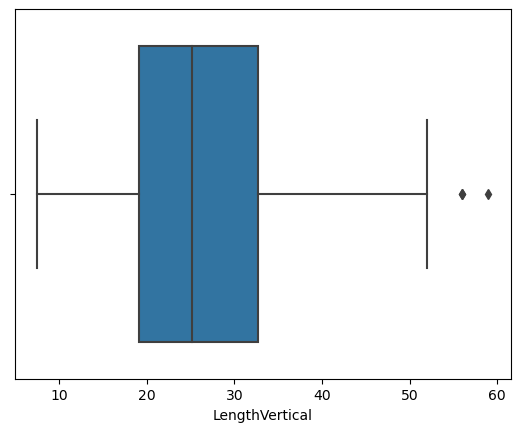

In [ ]:
sns.boxplot(x=df['LengthVertical']);

We calculate the lower and upper bounds for outliers based on the 'LengthVertical' feature using the interquartile range (IQR) method. Outliers in the 'LengthVertical' feature are identified and stored in the variable dflv_outliers.

In [ ]:
dflv = df['LengthVertical']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVertical, dtype: float64

A boxplot is created to visualize the distribution of the 'LengthDiagonal' feature in the dataset. It shows the median, quartiles, and any outliers present.

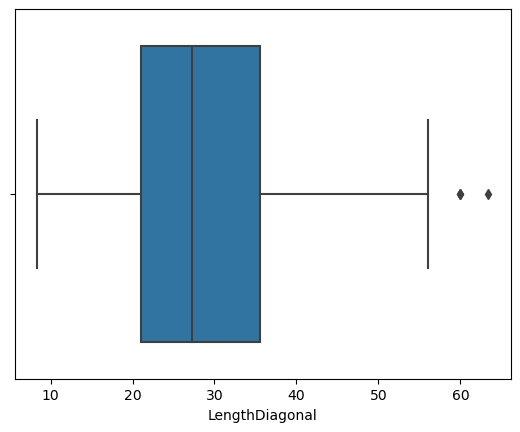

In [ ]:
sns.boxplot(x=df['LengthDiagonal']);

We calculate the lower and upper bounds for outliers based on the 'LengthDiagonal' feature using the interquartile range (IQR) method. Outliers in the 'LengthDiagonal' feature are identified and stored in the variable dfdia_outliers.

In [ ]:
dfdia = df['LengthDiagonal']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDiagonal, dtype: float64

A boxplot is created to visualize the distribution of the 'LengthCross' feature in the dataset. It shows the median, quartiles, and any outliers present.

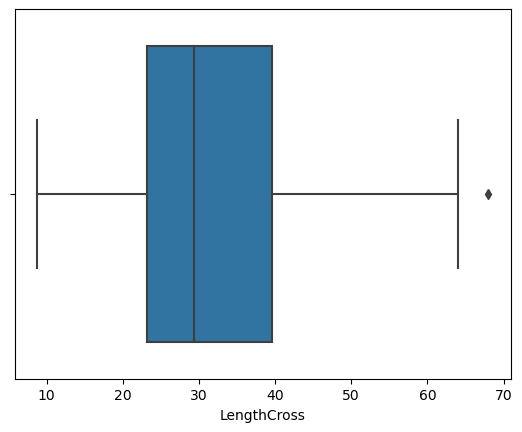

In [ ]:
sns.boxplot(x=df['LengthCross']);

We calculate the lower and upper bounds for outliers based on the 'LengthCross' feature using the interquartile range (IQR) method.Outliers in the 'LengthCross' feature are identified and stored in the variable dfcro_outliers.

In [ ]:
dfcro = df['LengthCross']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCross, dtype: float64

We display a subset of the dataset, specifically rows 142 to 144, which are identified as outliers.

In [ ]:
df[142:145]

,Species,Weight,LengthVertical,LengthDiagonal,LengthCross,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In this study, we are going to remove these 3 data entries from our dataset due to them being outliers. The data is modified by dropping the rows with indices 142, 143, and 144, and a new DataFrame called 'data' is created. A statistical summary of the modified 'data' DataFrame is displayed.

In [ ]:
data = df.drop([142,143,144])
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVertical,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDiagonal,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCross,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


**Shuffle Data**

The 'data' DataFrame is shuffled to randomize the order of rows using a seed for reproducibility.

In [ ]:
# Shuffle training dataframe
data = data.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
data.head()

,Species,Weight,LengthVertical,LengthDiagonal,LengthCross,Height,Width
96,Perch,225.0,22.0,24.0,25.5,7.2930,3.7230
69,Parkki,200.0,21.2,23.0,25.8,10.3458,3.6636
82,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 96 to 102
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         156 non-null    object 
 1   Weight          156 non-null    float64
 2   LengthVertical  156 non-null    float64
 3   LengthDiagonal  156 non-null    float64
 4   LengthCross     156 non-null    float64
 5   Height          156 non-null    float64
 6   Width           156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [ ]:
data.columns

Index(['Species', 'Weight', 'LengthVertical', 'LengthDiagonal', 'LengthCross',
       'Height', 'Width'],
      dtype='object')

We extract a list of numerical columns from the 'data' DataFrame.

In [ ]:
# Get list of numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols

['Weight',
 'LengthVertical',
 'LengthDiagonal',
 'LengthCross',
 'Height',
 'Width']

The dependent variable 'Weight' is assigned to the variable 'y', and the independent variables are assigned to the variable 'X'.

In [ ]:
# Dependant (Target) Variable:
y = data['Weight']
# Independant Variables:
X = data.iloc[:,2:7]

The data is split into training and test sets using the 'train_test_split' function from scikit-learn. The test set size is set to 20% of the data.

In [ ]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

We print the number of samples in the training and test datasets to verify the split.

In [ ]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


**Model: Hyperparameter Tuning**

We define hyperparameters for building a model, including the learning rate and batch size.

In [ ]:
LEARNING_RATE=0.001
BATCH_SIZE=32

The following code defines a function to build a neural network model using hyperparameters provided by the Keras Tuner. The hyperparameters include the number of layers, dropout rate, number of units in each layer, and regularization parameters. The model architecture consists of an input layer, hidden layers, dropout layer, and an output layer. The model is compiled with the mean squared error loss function, Adam optimizer, and mean absolute error metric. The function returns the constructed model.

In [ ]:
import kerastuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    from keras.layers import BatchNormalization
    from keras.regularizers import l1_l2

    # Define all hyperparameters
    n_layers = hp.Choice('n_layers', [2, 4, 6])
    dropout_rate = hp.Choice('rate', [0.2, 0.4, 0.5, 0.7])
    n_units = hp.Choice('units', [64, 128, 256, 512])
    l1_reg = hp.Choice('l1', [0.0, 0.01, 0.001, 0.0001])
    l2_reg = hp.Choice('l2', [0.0, 0.01, 0.001, 0.0001])

    # Model architecture
    model = Sequential()

    # Input layer
    model.add(Dense(n_units, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
    model.add(BatchNormalization())

    # Add hidden layers
    for _ in range(n_layers):
        model.add(Dense(n_units, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg)))
        model.add(BatchNormalization())

    # Add Dropout Layer
    model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        loss='mean_squared_error',
        optimizer = Adam(LEARNING_RATE),
        metrics = ['mean_absolute_error']
    )

    # Return model
    return model

The next code initializes a random search object using Keras Tuner. It specifies the hypermodel as the previously defined build_model function and sets the objective as minimizing the validation loss. The random search is performed for a maximum of 15 trials using the provided training and validation data.

In [ ]:
# Initialize Random Searcher
random_searcher = kt.RandomSearch(
    hypermodel=build_model,
    objective='val_loss',
    max_trials=15,
    seed=42,
    project_name="FishWeight-Search"
)

# Start Searching
search = random_searcher.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 100,
    batch_size = BATCH_SIZE
)


Trial 15 Complete [00h 00m 11s]
val_loss: 139371.8125

Best val_loss So Far: 12766.98046875
Total elapsed time: 00h 03m 03s


In the following code, the best model architecture obtained from the random search is collected using the get_best_hyperparameters method. The model is then compiled with the mean squared error loss function, Adam optimizer, and mean absolute error metric. The next code trains the best model using the provided training and validation data. It specifies the number of epochs, batch size, and includes callbacks for early stopping and model checkpointing. The training history is stored in the best_model_history variable.

In [ ]:
# Collect the best model Architecture obtained by Random Searcher
best_model = build_model(random_searcher.get_best_hyperparameters(num_trials=1)[0])

# Model Architecture
best_model.summary()

# Compile Model
best_model.compile(
    loss='mean_squared_error',
    optimizer=Adam(LEARNING_RATE),
    metrics=['mean_absolute_error']
)

# Model Training
best_model_history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 500,
    batch_size = BATCH_SIZE*2,
    callbacks = [
        EarlyStopping(patience=20, restore_best_weights=True),
        ModelCheckpoint("BestModel.h5", save_best_only=True)
    ]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               3072      
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)             

The subsequent code loads the best model architecture from the saved file "BestModel.h5" and displays a summary of the model's architecture.

In [ ]:
#  Load model
best_model = tf.keras.models.load_model('BestModel.h5')
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               3072      
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_7 (Batc  (None, 512)             

The next code evaluates the best model's performance on the test set and prints the mean squared error and mean absolute error.

In [ ]:
# Evaluate the best model
best_test_loss, best_test_acc = best_model.evaluate(X_test, y_test)
print(f"Validation MSE after Tuning     : {best_test_loss} ")
print(f"Validation MAE after Tuning : {best_test_acc}  ")

1/1 [==============================] - 0s 352ms/step - loss: 14613.6816 - mean_absolute_error: 96.4857
Validation MSE after Tuning     : 14613.681640625 
Validation MAE after Tuning : 96.48565673828125  


The subsequent code extracts the training and validation history from the best model's training process. It retrieves the mean absolute error and loss values for each epoch. The history is then plotted using matplotlib, showing the training and validation accuracy as well as the training and validation loss.

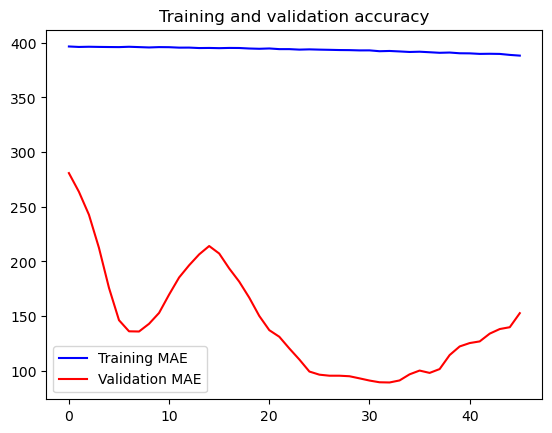

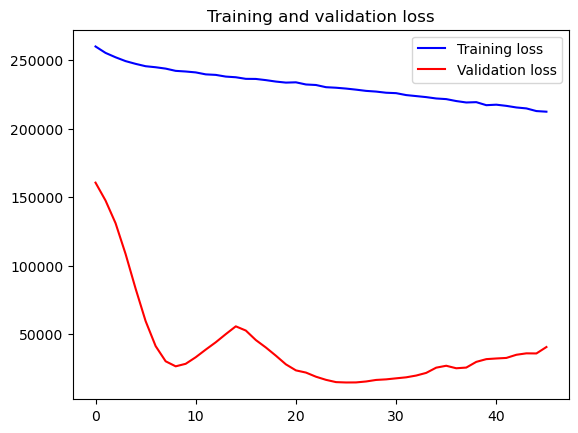

In [ ]:
# Extract the history from the best model
accuracy = best_model_history.history['mean_absolute_error']
val_accuracy = best_model_history.history['val_mean_absolute_error']

loss = best_model_history.history['loss']
val_loss = best_model_history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training MAE')
plt.plot(epochs, val_accuracy, 'r', label='Validation MAE')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()


The next code makes predictions on the test data using the trained model.

In [ ]:
test_pred = best_model.predict(X_test)

1/1 [==============================] - 0s 271ms/step


In [ ]:
# Ensure 'y_test' and 'test_pred' are 1D
y_test = tf.squeeze(y_test)
test_pred = tf.squeeze(test_pred)

The following code creates a DataFrame (dr) to store the actual and predicted values, as well as the difference and percentage difference between them.

In [ ]:
# Now create the DataFrame
dr = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred})

# Calculate the difference
dr['Difference'] = dr['Predicted'] - dr['Actual']

# Calculate the percentage difference
dr['Percentage Difference'] = (dr['Difference'] / dr['Actual']) * 100

dr = dr.round(2)
dr.head(20)

,Actual,Predicted,Difference,Percentage Difference
0,161.0,279.970001,118.97,73.89
1,145.0,244.070007,99.07,68.32
2,160.0,256.440002,96.44,60.27
3,514.0,492.190002,-21.81,-4.24
4,345.0,563.349976,218.35,63.29
5,145.0,275.980011,130.98,90.33
6,320.0,410.890015,90.89,28.40
7,169.0,292.010010,123.01,72.79
8,450.0,452.950012,2.95,0.66
9,9.8,-48.590000,-58.39,-595.84


The code assigns the predicted values (test_pred) to y_pred_sub and the actual values (y_test) to y_test_sub. The code plots a line graph comparing the predicted values (y_pred_sub) with the actual values (y_test_sub) using the index as the x-axis.

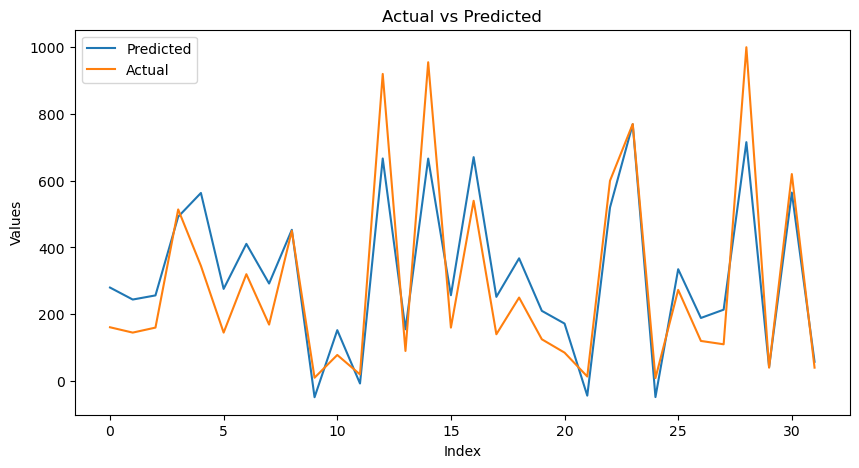

In [ ]:
y_pred_sub = test_pred[:200]
y_test_sub = y_test[:200]

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_pred_sub)), y_pred_sub, label='Predicted')
plt.plot(range(len(y_test_sub)), y_test_sub, label='Actual')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.title("Actual vs Predicted")
plt.show()